### Generate Specific Class Image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import torch
from torchvision import models
from torch.autograd import Variable

### 1. Load Image & Labels

In [2]:
labels = 'https://s3.amazonaws.com/outcome-blog/imagenet/labels.json'
classes = {int(key):value for (key, value) in requests.get(labels).json().items()}

### 2. Generate Specific Class Image

In [12]:
iterations = 300
lr = 10
reg = 1
label = 777

model = models.vgg19(pretrained=True).cuda()

cmap = np.zeros((224, 224, 3))
mean = np.array([0.485, 0.456, 0.406])
cmap += mean
cmap = cmap.transpose(2, 1, 0)
cmap = Variable(torch.Tensor(cmap).unsqueeze(0).cuda(), requires_grad = True)

for i in range(iterations):
    model.zero_grad()
    output = model.forward(cmap)
    class_score = output[0][label]
    reg_out = -class_score + reg * cmap.norm()
    reg_out.backward()
    cmap.data = cmap.data + lr * cmap.grad.data

### 3. Visualization

Text(0.5, 1.0, 'scabbard')

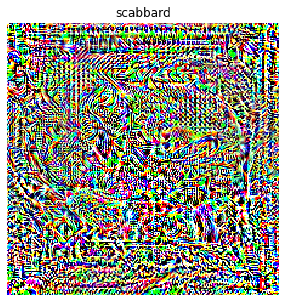

In [13]:
cmap_ = cmap.data.squeeze().transpose_(0,1).transpose_(1,2)
cmap_ = cmap_ * torch.Tensor([0.229, 0.224, 0.225]).cuda() + torch.Tensor([0.485, 0.456, 0.406]).cuda()

cmap_ = np.clip(np.array(cmap_.cpu()),0,255).astype('uint8')
plt.figure(figsize=(5,5))
plt.imshow(cmap_)
plt.axis('off')
plt.title(classes[label])